# Ford Go Bike Dataset Exploration
## by Steven John

## Investigation Overview

* Ford Go bike services offers rental services for bikes.

* Our overall goals for this presentation could be divided into 3 main points which are:
<ol> <b>
    <li>When is the busiest time for the rental services? according to weekend or weekdays, hour, user type and which user type uses the rental services more?</li>
    <li>What is the average ride duration and which user type and gender enjoys longer rides and on what day?</li>
    <li>What are the top three busiest start and end stations? Least three busiest start and end stations?</li>
    </b> </ol>

## Dataset Overview

Ford Go bike services provides rental services for bikes
This dataset includes trips taken by users in month of February 2019 covering the greater San Francisco Bay and after preliminary wrangling, removing outliers and adding new featuers the dataset now contains 174952 rows and 16 columns and information about the trips taken by the users such as their: duration, station, users age, user type, user gender, start date and hour ect.

In [29]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [30]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [31]:
# Now we will apply wrangling and adding new featuers
# Drop uneeded columns
df.drop(['start_station_latitude','start_station_longitude','end_station_latitude', 'end_station_longitude','start_station_id'
        ,'end_station_id','bike_share_for_all_trip'], axis=1 ,inplace=True)
# Now lets drop the null values of start_station_name, end_station_name, member_birth_year, member_gender since 
# the portion of the null values are about only 4.6% of the dataset which small
df.dropna(inplace=True)
#Now I will fix the datatypes accordingly
#fix data types by changing start_time and end_time to date format
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])
#change member_birth_year to int format
df['member_birth_year']=df.member_birth_year.astype(int)
# Creating new column for the day name
df['day_name'] = df['start_time'].dt.day_name()
# Creating new column for the duration in mins name
# in the duration_min I round up thus even 1 min and 1 secs taken will be considerd a 2 min rent
df['duration_min'] = round((df['duration_sec']/60),2)
# here I round so if rent duration took about 2 hours and 20 min then I round to 2 hours but if took around 2 hours and 50 min
# then I we round to 3 hours 
df['duration_hour'] = round(df['duration_min']/60)
# Creating new column for the Age of the biker
df['age'] = 2021 - df['member_birth_year']
# Creating new column for is it a weekend day or not
def add_isweekend(df_column):
    df['isWeekend'] = df_column.apply(lambda x:'Week_End' if x=="Saturday" or x=="Sunday" else 'Week_Day')
    pass


add_isweekend(df['day_name'])
# I will also Add the hour the rental starts at and the hour it ends at
df['Start_hour'] = pd.DatetimeIndex(df['start_time']).hour
df['end_hour'] = pd.DatetimeIndex(df['end_time']).hour

# Now we will remove the outliers in duration_min
df = df[(df['duration_min'] <= 60)]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [32]:
(df.query('user_type == "Subscriber"').shape[0]/df.shape[0]) *100

90.85996105227983

## When is the busiest time for the rental services? according to weekend or weekdays, hour, user type and which user type uses the rental services more?
### From our  visulization we have surmized that:

    
* In general the busiest time for the rental service will be on weekdays especially on Tuesday and Thursday at 8 am and 5 pm.
* For user type customers, the busiest time wil be on Thursday at 5pm. and Friday at 8 am.
* For user type Subscriber, the busiest time wil be on Tuesday and Thursday at 8 am.
* About 90 % of the rental services users are Subscribers.

 

### Conclusion: 


    
* We can estimate that users mostly use the rental service to commute to thier jobs during the weekdays as the start hours also corosponds with normal office hours 
   



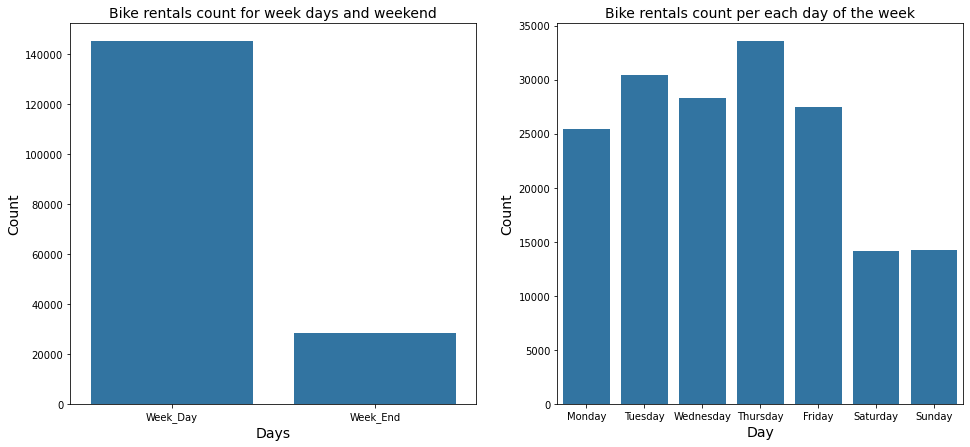

In [33]:
base_color = sb.color_palette()[0]
order_index= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(16,7));
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = "isWeekend",color=base_color)
plt.title("Bike rentals count for week days and weekend",fontsize=14);
plt.ylabel("Count",fontsize=14)
plt.xlabel("Days",fontsize=14);

plt.subplot(1, 2, 2)

sb.countplot(data = df, x = "day_name",color=base_color, order=order_index)
plt.title("Bike rentals count per each day of the week",fontsize=14);
plt.ylabel("Count",fontsize=14)
plt.xlabel("Day",fontsize=14);

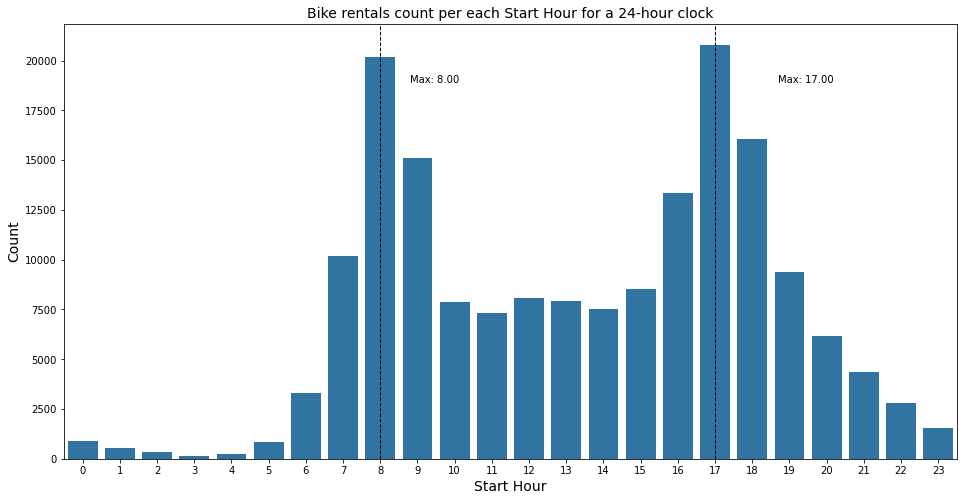

In [34]:
plt.figure(figsize=(16,8));
sb.countplot(data = df, x = 'Start_hour',color=base_color)
plt.title("Bike rentals count per each Start Hour for a 24-hour clock",fontsize=14);
plt.ylabel("Count",fontsize=14)
plt.xlabel("Start Hour",fontsize=14);
x_pos1=df['Start_hour'].value_counts().index[0]
plt.axvline(x_pos1, color='k', linestyle='dashed', linewidth=1);
plt.text(x_pos1*1.1, 21000*0.9, 'Max: {:.2f}'.format(x_pos1.max()));
x_pos2=df['Start_hour'].value_counts().index[1]
plt.axvline(x_pos2, color='k', linestyle='dashed', linewidth=1);
plt.text(x_pos2*1.1, 21000*0.9, 'Max: {:.2f}'.format(x_pos2.max()));

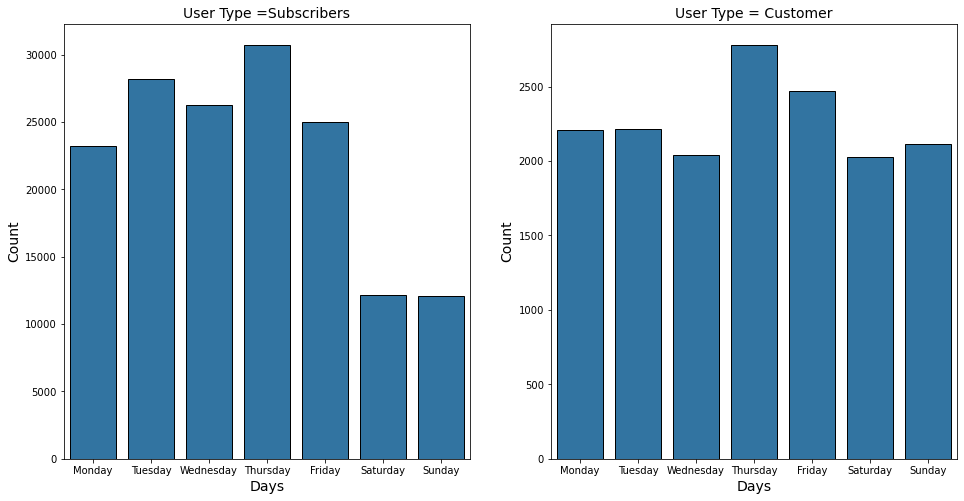

In [35]:
order_index= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day = pd.api.types.CategoricalDtype(ordered=True, categories=order_index)
df['day_name'] = df['day_name'].astype(day);

plt.figure(figsize=(16,8));
plt.subplot(1,2,1)
df_sub=df.query('user_type == "Subscriber"')
axe1= sb.countplot(data = df_sub, x = "day_name", color=base_color,edgecolor='black')
plt.title("User Type =Subscribers",fontsize=14);
plt.ylabel("Count",fontsize=14);
plt.xlabel("Days",fontsize=14);


plt.subplot(1,2,2)
df_cust=df.query('user_type == "Customer"')
sb.countplot(data = df_cust, x = "day_name", color=base_color ,edgecolor='black')
plt.title("User Type = Customer",fontsize=14);
plt.ylabel("Count",fontsize=14);
plt.xlabel("Days",fontsize=14);

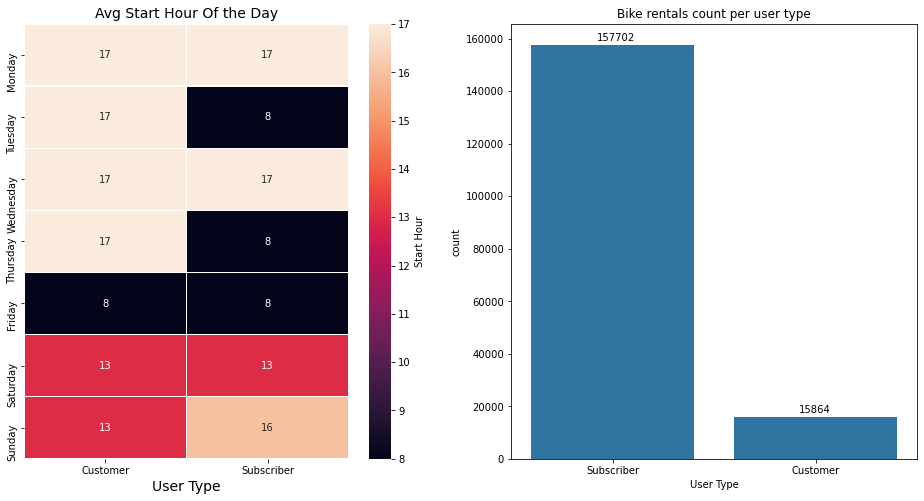

In [36]:
ct_counts = df.groupby(['day_name', 'user_type'])['Start_hour'].agg(pd.Series.mode)
ct_counts = ct_counts.reset_index(name='count')
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
ct_counts = ct_counts.pivot(index = 'day_name', columns = 'user_type', values = 'count')
sb.heatmap(ct_counts, annot = True,linewidths=.3,cbar_kws = {'label' : 'Start Hour'});
plt.ylabel('' ,fontsize=14);
plt.xlabel("User Type",fontsize=14);
plt.title('Avg Start Hour Of the Day',fontsize=14);

plt.subplot(1,2,2)
ax = sb.countplot(data = df, x = 'user_type',order=df['user_type'].value_counts().index, color=base_color)
plt.title("Bike rentals count per user type");
plt.xlabel("User Type");
for i in range (df['user_type'].value_counts().shape[0]):
    count = df['user_type'].value_counts()[i]
    pct_string = '{}'.format(count)
    plt.text(i-0.08, count+2800, pct_string, va='center')

## What are the average ride duration and which user type and gender enjoys longer rides and on what day?
Note: we ablied logarithmic scale on the histogram of the rides per duration in mins because most data was right skewed.

### From our  visulization we have surmized that:

    
* The average ride duration is betwen 8 min to 10 min In general.
* user type customers seem to enjoy longer ride duration and especially on weekends with an average duration of 17 min while the sibscribers had an average duration of 10 min on Saturday and Sunday
* user type customer and gender female enjoy the longest ride with avg duration of about 16 mins.


### Conclusion: 


    
* I guess the users in general like to enjoy longer rider on thier day off especially user type customers who are female.
   


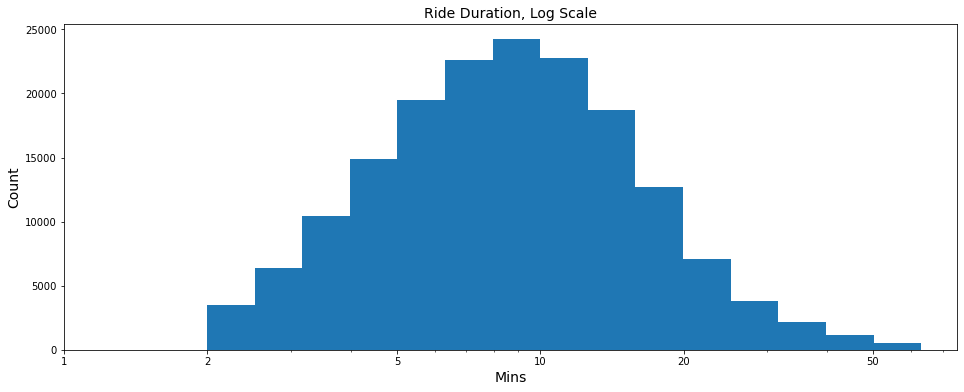

In [37]:
bin_edges = 10 ** np.arange(0.3, 1.778+0.1, 0.1)
plt.figure(figsize=(16,6));
plt.hist(df['duration_min'], bins = bin_edges)
plt.xscale('log')
ticks = [1,2,5,10,20,50]
plt.xticks(ticks, ticks)
plt.title("Ride Duration, Log Scale",fontsize=14);
plt.ylabel("Count",fontsize=14)
plt.xlabel("Mins",fontsize=14);

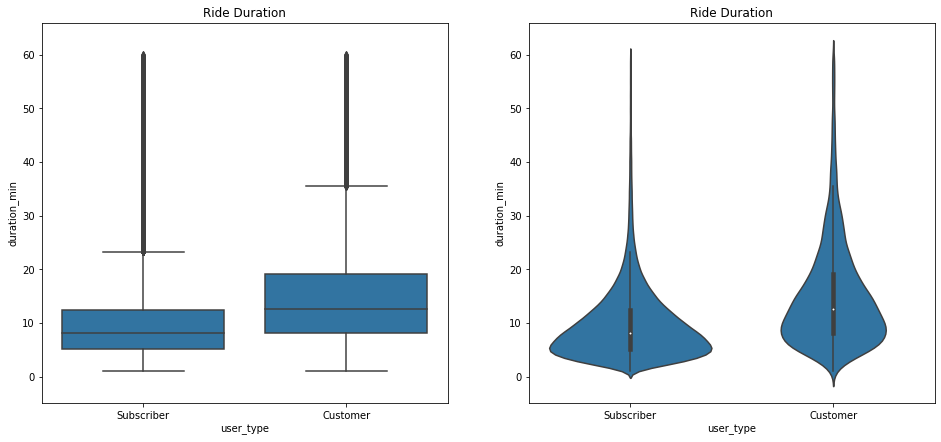

In [38]:
plt.figure(figsize = (16, 7))
plt.subplot(1, 2, 1)
axe1 = sb.boxplot(data = df, y = 'duration_min', x = 'user_type', color = base_color)
plt.title("Ride Duration");
plt.subplot(1, 2, 2, sharey=axe1)
sb.violinplot(data = df, y= 'duration_min', x = 'user_type', color = base_color)
plt.title("Ride Duration");


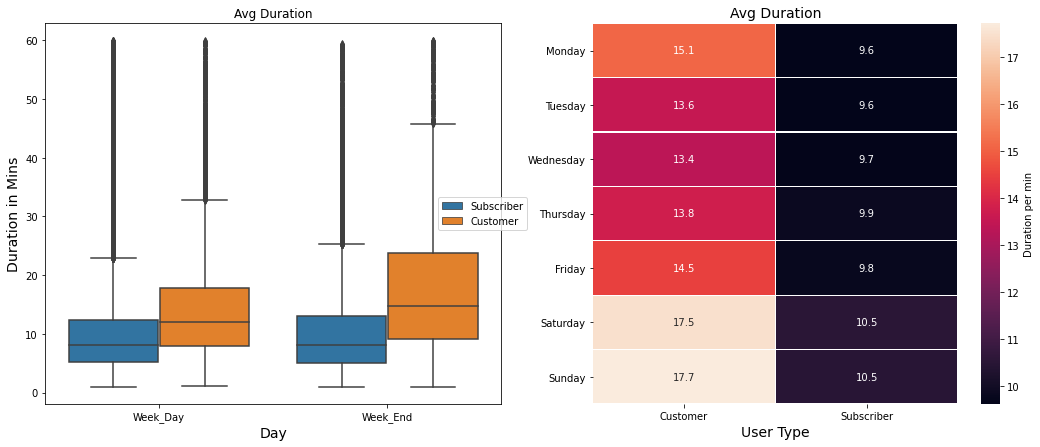

In [39]:
plt.figure(figsize = (18, 7))
plt.subplot(1,2,1)
sb.boxplot(data=df, x='isWeekend', y='duration_min', hue="user_type")
plt.ylabel('Duration in Mins' ,fontsize=14);
plt.xlabel("Day",fontsize=14);
plt.title('Avg Duration');
plt.legend(bbox_to_anchor = (0.85, 0.5), loc = 6);
ct_counts = df.groupby(['day_name', 'user_type'])['duration_min'].mean()
ct_counts = ct_counts.reset_index(name='count')
plt.subplot(1,2,2)
ct_counts = ct_counts.pivot(index = 'day_name', columns = 'user_type', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = '.01f',linewidths=.3,cbar_kws = {'label' : 'Duration per min'});
plt.ylabel('' ,fontsize=14);
plt.xlabel("User Type",fontsize=14);
plt.title('Avg Duration',fontsize=14);

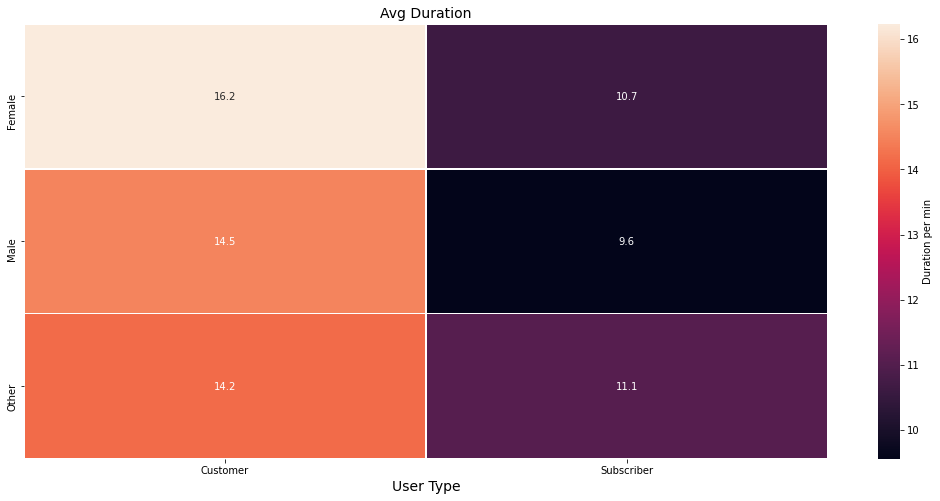

In [40]:
ct_counts = df.groupby(['member_gender', 'user_type'])['duration_min'].mean()
ct_counts = ct_counts.reset_index(name='count')
plt.figure(figsize=(18,8))
ct_counts = ct_counts.pivot(index = 'member_gender', columns = 'user_type', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = '.01f',linewidths=.3,cbar_kws = {'label' : 'Duration per min'});
plt.ylabel('' ,fontsize=14);
plt.xlabel("User Type",fontsize=14);
plt.title('Avg Duration',fontsize=14);

## What are the top three busiest start and end stations? Least three busiest start and end stations?

### From our  visulization we have surmized that:

    
* The Top three busiest start stations are 'Market St at 10th St',
  'San Francisco Caltrain Station 2  (Townsend St at 4th St)' and
  'Berry St at 4th St'
* Top Three busiest end stations are 'San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St' and 'Montgomery St BART Station (Market St at 2nd St)'
* the Lowest three busiest start stations are '16th St Depot', 'Palm St at Willow St'and '21st Ave at International Blvd'
* the Lowest three busiest end stations are '16th St Depot', 'Willow St at Vine St' and '21st Ave at International Blvd'

  

### Conclusion: 

   
* The top three busiest start stations provide rental serivce for about 5% and top three busiest end station provide rental serivce for about 6% while the lowest three busiest stations both end and start stations combiend provides rental service for merley about 0.01% out of 329 stations 



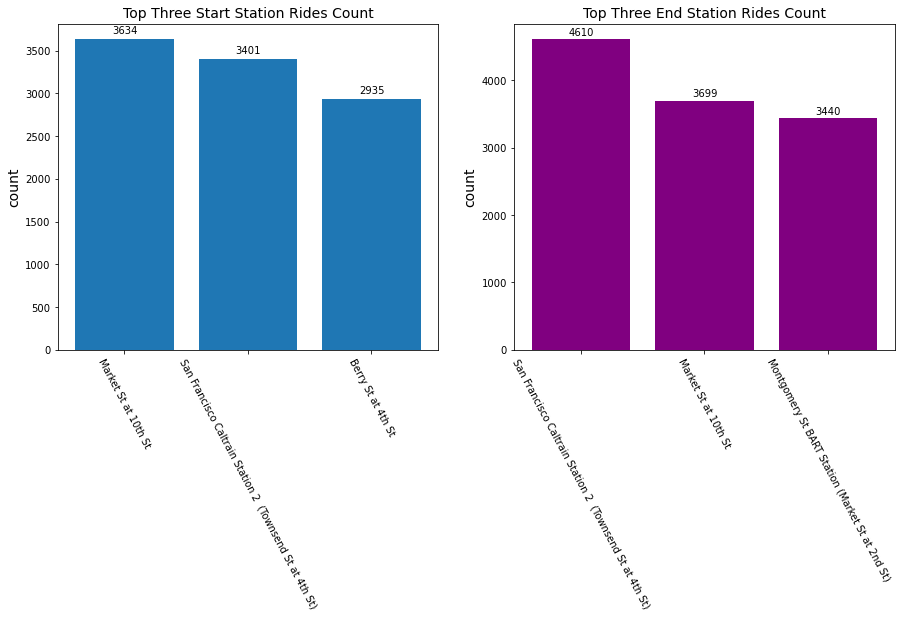

In [41]:
# this will be a user defiend function that I will propably use again later
# this function will return the top start or end stations with the highest or lowest traffic based on user input
def top_companies(name,n,reverse =False):
    top_five_values=[]; top_five_names=[]
    for i in range(n):
        if reverse:
            i=(df[name].value_counts().shape[0] -1) -i
                
        top_five_names.append(df[name].value_counts().index[i])
        top_five_values.append(df[name].value_counts()[i])

    return top_five_names, top_five_values

names ,values = top_companies('start_station_name',3)
plt.figure(figsize=(15,6));
plt.subplot(1, 2, 1)
plt.bar(x=names,height=values,align="center")
for i in range (len(names)):
    count = values[i]
    pct_string = '{}'.format(count)
    plt.text(i-0.1, count+100, pct_string, va='center')
plt.xticks(rotation=-62) ;
plt.title('Top Three Start Station Rides Count',fontsize=14);
plt.ylabel('count',fontsize=14);

names ,values = top_companies('end_station_name',3 )
plt.subplot(1, 2, 2)
plt.bar(x=names,height=values,align="center",color="purple")
for i in range (len(names)):
    count = values[i]
    pct_string = '{}'.format(count)
    plt.text(i-0.1, count+100, pct_string, va='center')
plt.xticks(rotation=-62) ;
plt.title('Top Three End Station Rides Count',fontsize=14);
plt.ylabel('count',fontsize=14);

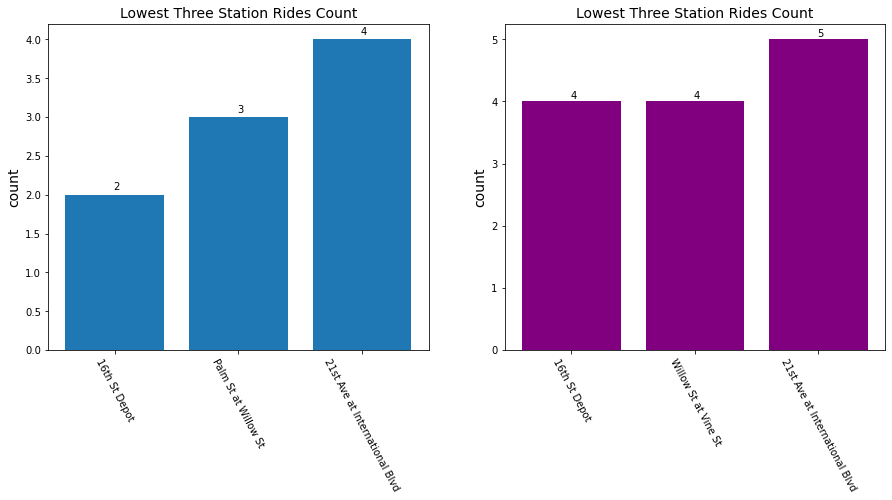

In [42]:
# the lowest three
names ,values = top_companies('start_station_name',3,True)
plt.figure(figsize=(15,6));
plt.subplot(1, 2, 1)
plt.bar(x=names,height=values,align="center")
for i in range (len(names)):
    count = values[i]
    pct_string = '{}'.format(count)
    plt.text(i-0.01, count+0.1, pct_string, va='center')
plt.xticks(rotation=-62) ;
plt.title('Lowest Three Station Rides Count',fontsize=14);
plt.ylabel('count',fontsize=14);

names ,values = top_companies('end_station_name',3 ,True)
plt.subplot(1, 2, 2)
plt.bar(x=names,height=values,align="center",color="purple")
for i in range (len(names)):
    count = values[i]
    pct_string = '{}'.format(count)
    plt.text(i-0.01, count+0.1, pct_string, va='center')
plt.xticks(rotation=-62) ;
plt.title('Lowest Three Station Rides Count',fontsize=14);
plt.ylabel('count',fontsize=14);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!